In [102]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import imgaug.augmenters as iaa
import cv2
import statistics

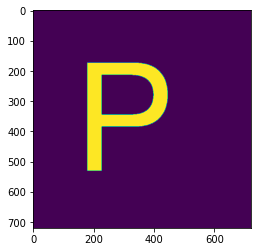

In [103]:
P = cv2.imread('P.png',0)
_, P = cv2.threshold(P, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(P) 

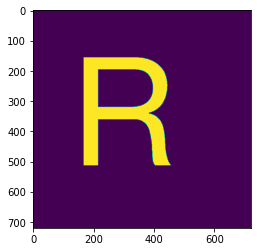

In [104]:
R = cv2.imread('R.png',0)
_, R = cv2.threshold(R, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(R)

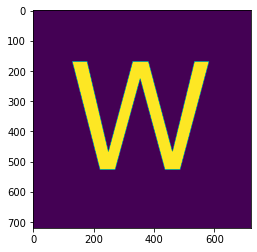

In [105]:
W = cv2.imread('W.png',0)
_, W = cv2.threshold(W, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(W)

In [170]:
seq = iaa.Sequential([
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-90, 90),
    )
], random_order=True)

In [171]:
P_cs = [seq(images=np.array(P)) for _ in range(10)]
W_cs = [seq(images=np.array(W)) for _ in range(10)]
R_cs = [seq(images=np.array(R)) for _ in range(10)]

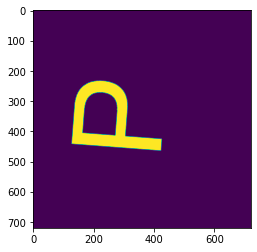

In [172]:
plt.imshow(P_cs[0])

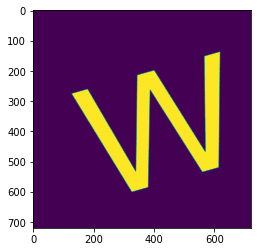

In [173]:
plt.imshow(W_cs[0])

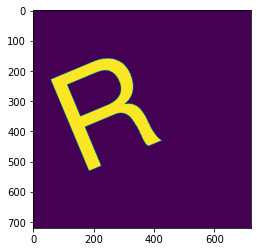

In [174]:
plt.imshow(R_cs[9])

In [175]:
def get_hu_moments(imgs, names, hu_nr):
    results = {}
    for i in range(len(imgs)):
        results[names[i]] = {}
        for j in range(len(imgs[i])):
            moments = cv2.moments(imgs[i][j])
            hu_moment = cv2.HuMoments(moments)[hu_nr][0]
            results[names[i]][j] = hu_moment
    return results

In [176]:
import pandas as pd
import math
results = [get_hu_moments([P_cs, W_cs, R_cs], ['P','W','R'], hu_nr) for hu_nr in range(7)]
dfs = [pd.DataFrame(data=result) for result in results]

In [177]:
dfs[1]

,P,W,R
0,3.228549e-07,3.162934e-07,1.471985e-07
1,2.875498e-07,2.346282e-07,2.086036e-07
2,2.959608e-07,2.104684e-07,1.991487e-08
3,3.081067e-07,1.808321e-12,2.296067e-08
4,2.971791e-07,3.670816e-09,1.738567e-08
5,3.890376e-07,6.240317e-08,3.525436e-07
6,5.093204e-07,6.270613e-07,2.567085e-08
7,2.846933e-07,8.636497e-09,1.252680e-08
8,3.988124e-07,2.112477e-08,5.952968e-08
9,4.441754e-07,3.680634e-09,2.369579e-08


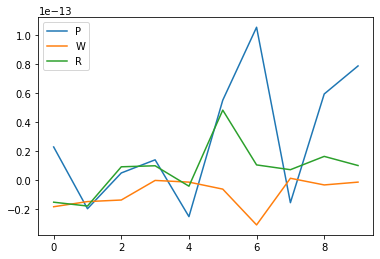

In [190]:
dfs[5].plot()